<a href="https://colab.research.google.com/github/BeautyKabore/UNT-DTSC-4050/blob/main/Week_08_Hypothesis_Testing/Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrapping

* Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples. This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics.

https://statisticsbyjim.com/hypothesis-testing/bootstrapping/

* Distribution of samples with replacement from original sample
* These resamples are known as sampling distributions of estimates
* Central Limit Theorem says these resamples will start to look like a normal distribution which is a symmetrical dispersion of data around the mean
* Skewness of the original distribution disappears
* Now we are able to quantify our uncertainty about our estimates – we can find the range of values that bind 68%, 95%, 99.7% spreads of the normal curve
* The bootstrap distributions get narrower as the sample size increases
* Mean tells us expected value
* Variance provides a level of assurance regarding the mean (the more spread out the distribution the less assurance regarding the mean, samples are further away from the mean)
* Bootstrapping allows for different adjustments to bias and variance

<pre>
Bootstrapping with Replacement – repeatedly drawing samples from our sample with replacement
•	111 = 3
•	121 = 4
•	122 = 5
•	113 = 5
•	123 = 6
•	222 = 6
•	223 = 7
•	331 = 7
•	332 = 8
•	333 = 9

Combination with Replacement (3 numbers): (n + r - 1)! / (r!(n - 1)!)
•	n=3
•	r=3
•	(3 + 3 - 1)! = 5 * 4 * 3 * 2 * 1 = 120
•	(3 * 2 * 1) * (2 * 1) = 12
•	= 10
•	123 = 10 combinations 3 – 9

Combination with Replacement (4 numbers): (n + r - 1)! / (r!(n - 1)!)
•	n=4
•	r=4
•	(4 + 4 - 1)! = 7 * 6 * 5 * 4 * 3 * 2 * 1 = 5040
•	(4 * 3 * 2 * 1) * (3 * 2 * 1) = 144
•	= 35
1234 = 35 combinations 4 – 16
</pre>

In [ ]:
# https://towardsdatascience.com/bootstrapping-for-inferential-statistics-9b613a7653b2
import pandas as pd

coffee = pd.read_csv('https://raw.githubusercontent.com/samarth-agrawal-86/data_scientist_toolkit/master/coffee_dataset.csv')
print(coffee.shape)
coffee.head()

(2974, 4)


,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [ ]:
# take a sample and then find the mean of coffee drinkers
coffee_sample = coffee.sample(n=200)
coffee_sample.groupby('drinks_coffee').size() / coffee_sample.shape[0]

drinks_coffee
False    0.405
True     0.595
dtype: float64

In [ ]:
coffee_sample.groupby('drinks_coffee')['height'].agg('mean')

drinks_coffee
False    66.657535
True     68.355414
Name: height, dtype: float64

## Distribution of Sample Means

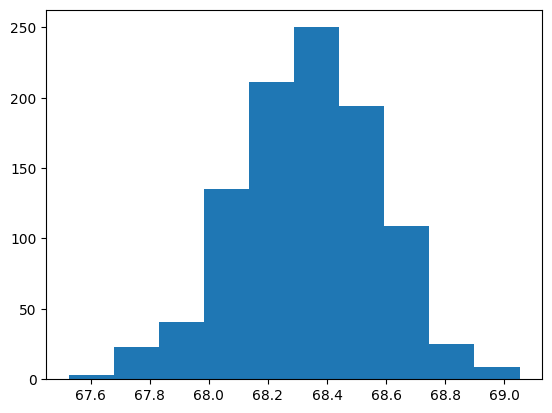

In [ ]:
# collect bootstrapped means
import matplotlib.pyplot as plt

bootstrap_means_1000 = []

for i in range(1000):
    boot = coffee_sample.sample(200, replace=True)
    boot_mean = boot[boot['drinks_coffee']==True]['height'].mean()
    bootstrap_means_1000.append(boot_mean)

plt.hist(bootstrap_means_1000);

## Confidence Intervals

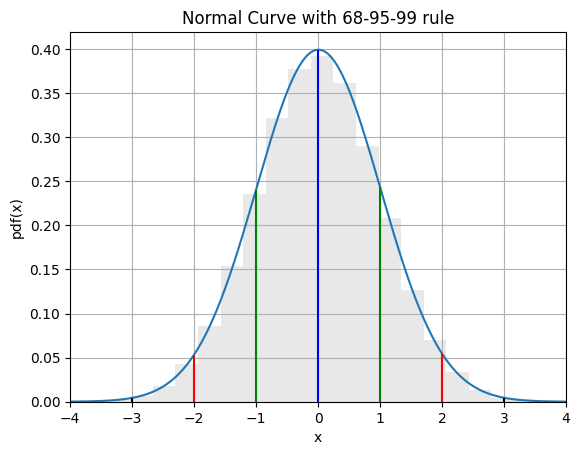

In [ ]:
# the normal curve
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

X = stats.norm.rvs(size=100000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')
# plt.axvline(np.percentile(X, 2.5), color='black')
# plt.axvline(np.percentile(X, 97.5), color='black')

plt.title('Normal Curve with 68-95-99 rule')
plt.show()

In [ ]:
# z value for confidence intervals for a standard normal distribution and our sample
import numpy as np
from scipy import stats

bs_mean = np.mean(bootstrap_means_1000)
bs_std = np.std(bootstrap_means_1000)
print(f'z for 95% of standard normal: {np.round(np.abs(stats.norm.ppf(0.025)), 3)}')
print(f'z for 2.5% of sampled means: {np.round(np.abs(stats.norm.ppf(0.025, loc=bs_mean, scale=bs_std)), 3)}')
print(f'z for 97.5% of sampled means: {np.round(np.abs(stats.norm.ppf(0.975, loc=bs_mean, scale=bs_std)), 3)}')

z for 95% of standard normal: 1.96
z for 2.5% of sampled means: 67.871
z for 97.5% of sampled means: 68.803


67.82636570784695 68.3369593387444 68.85456856293905 0.007523036326472569


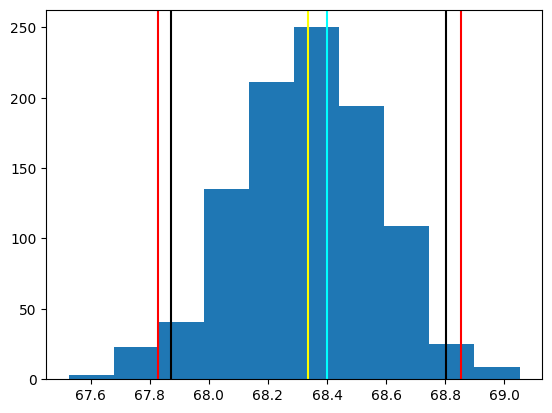

In [ ]:
# plot confidence intervals for bootstrap means 1000
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

popmean = coffee[coffee['drinks_coffee']==True]['height'].mean()
bs_mean = np.mean(bootstrap_means_1000)
bs_std = np.std(bootstrap_means_1000)
z = np.round(np.abs(stats.norm.ppf(0.025, loc=bs_mean, scale=bs_std)), 3)
zlo = stats.norm.ppf(.025, loc=bs_mean, scale=bs_std)
zhi = stats.norm.ppf(.975, loc=bs_mean, scale=bs_std)
se = bs_std/np.sqrt(len(bootstrap_means_1000))
moe_lo = zlo * se
moe_hi = zhi * se
ci_lo = bs_mean - moe_lo
ci_hi = bs_mean + moe_hi
print(ci_lo, bs_mean, ci_hi, se)
plt.hist(bootstrap_means_1000)
plt.axvline(np.mean(bootstrap_means_1000), color='yellow')
plt.axvline(popmean, color='cyan')
plt.axvline(ci_lo, color='red')
plt.axvline(ci_hi, color='red')
plt.axvline(zlo, color='black')
plt.axvline(zhi, color='black')
plt.show()

In [ ]:
# original sample mean
print('sample: ', coffee_sample[coffee_sample['drinks_coffee']==True]['height'].mean())
print('population: ', coffee[coffee['drinks_coffee']==True]['height'].mean())

sample:  68.3554136855889
population:  68.40021025548381
